<a href="https://colab.research.google.com/github/CharlemagneBrain/Deep_Learning_Crash_Course_Practice/blob/main/Deep_Learning_Crash_Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Binaire
## Prédiction de l'authenticité d'un billet

### Basé sur certaines caractéristiques telles que la variance, l'asymétrie, la courbure et l'entropie de plusieurs images de billets de banque.

In [1]:
%matplotlib inline
%load_ext tensorboard
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
rm -rf ./logs/

In [3]:
banknote_data = pd.read_csv("https://raw.githubusercontent.com/AbhiRoy96/Banknote-Authentication-UCI-Dataset/master/bank_notes.csv")

In [4]:
banknote_data.head()

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
banknote_data.shape

(1372, 5)

### Distribution des données par rapport aux valeurs de la classe que nous voulons prédire.

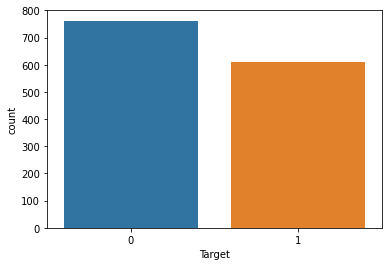

In [6]:
sns.countplot(x="Target", data=banknote_data);

Divisons nos données entre les caractéristiques et l'étiquette cible

In [7]:
X = banknote_data.drop("Target", axis=1)
y = banknote_data["Target"]

X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [8]:
print(X.shape)
print(y.shape)

(1372, 4)
(1372,)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20,random_state=42)

In [10]:
# On vas mettre à l'échelle nos données
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [11]:
X_train

array([[ 0.698537  ,  1.29756315, -1.03961179, -0.7480699 ],
       [ 0.56471683, -0.11528133,  0.65704843,  0.99968617],
       [-0.39696736, -0.90281396,  0.63472396,  1.28473713],
       ...,
       [-2.6206171 ,  1.25664152, -0.28503518, -1.58658083],
       [-1.36595657,  0.13125403, -0.28603281,  0.08436004],
       [-1.33006301, -1.56125853,  2.33715134,  0.29874805]])

In [12]:
#L'ajout d'un dropout après chaque couche évite le surajustement.
def create_model(learning_rate, dropout_rate):
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Dense(12, input_dim=X_train.shape[1], activation=tf.keras.activations.relu))
  #model.add(tf.keras.layers.Dense(12, activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.Dropout(rate=dropout_rate))

  model.add(tf.keras.layers.Dense(6, activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.Dropout(rate=dropout_rate))

  model.add(tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid))

  model.compile(
      loss = tf.keras.losses.BinaryCrossentropy(),
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
      metrics=["accuracy"]
  )

  return model


In [13]:
dropout_rate = 0.1
learning_rate = 0.001
epochs = 20
batch_size = 4


In [14]:
model = create_model(learning_rate, dropout_rate);

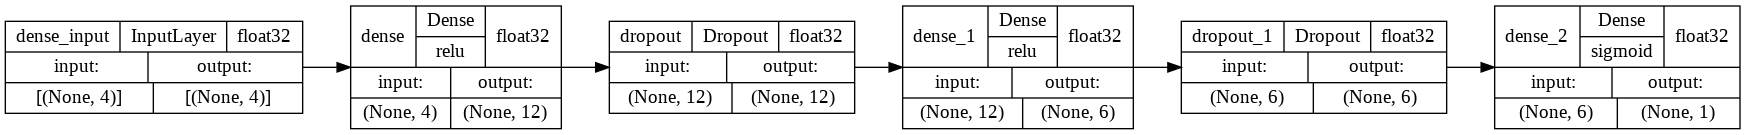

In [15]:
tf.keras.utils.plot_model(model, to_file='model_plot1.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_dtype=True, rankdir="LR",
                          expand_nested=False)

In [16]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [17]:
model_history = model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    callbacks=[tensorboard_callback],
    epochs=epochs,
    validation_split=0.2,
    verbose=1
)

Epoch 1/20
271/271 [==============================] - 1s 2ms/step - loss: 0.5928 - accuracy: 0.6744 - val_loss: 0.4728 - val_accuracy: 0.8745
Epoch 2/20
271/271 [==============================] - 0s 1ms/step - loss: 0.3875 - accuracy: 0.8807 - val_loss: 0.2610 - val_accuracy: 0.9262
Epoch 3/20
271/271 [==============================] - 0s 1ms/step - loss: 0.2411 - accuracy: 0.9223 - val_loss: 0.1297 - val_accuracy: 0.9668
Epoch 4/20
271/271 [==============================] - 0s 1ms/step - loss: 0.1570 - accuracy: 0.9491 - val_loss: 0.0702 - val_accuracy: 0.9815
Epoch 5/20
271/271 [==============================] - 1s 2ms/step - loss: 0.1128 - accuracy: 0.9648 - val_loss: 0.0420 - val_accuracy: 0.9889
Epoch 6/20
271/271 [==============================] - 1s 3ms/step - loss: 0.0878 - accuracy: 0.9824 - val_loss: 0.0289 - val_accuracy: 0.9963
Epoch 7/20
271/271 [==============================] - 1s 3ms/step - loss: 0.0746 - accuracy: 0.9833 - val_loss: 0.0204 - val_accuracy: 0.9963
Epoch 

In [18]:
# Évaluons notre modèle
predictions = model.evaluate(X_test, y_test, verbose=1)

print(f"Score de l'ensemble de données de test : {predictions[0]}")
print(f"Précision de l'ensemble de données de Test : {predictions[1]}")

1/1 [==============================] - 0s 14ms/step - loss: 0.0039 - accuracy: 1.0000
Score de l'ensemble de données de test : 0.003942052833735943
Précision de l'ensemble de données de Test : 1.0


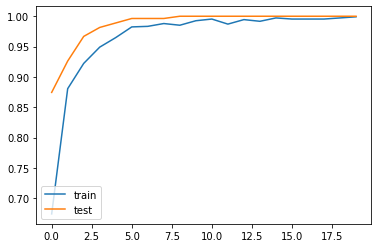

In [19]:
plt.plot(model_history.history['accuracy'], label="Précision")
plt.plot(model_history.history['val_accuracy'], label="Valeur de la Précision")
plt.legend(['train','test'], loc='lower left');

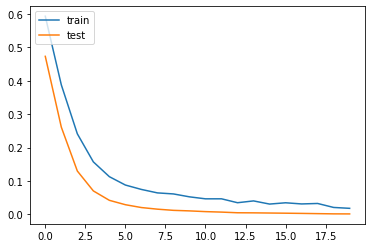

In [20]:
plt.plot(model_history.history['loss'], label = 'loss')
plt.plot(model_history.history['val_loss'], label = 'val_loss')
plt.legend(['train','test' ], loc='upper left');

# Classification Multi-Classe





In [21]:
iris_data = sns.load_dataset('iris')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
X = iris_data.drop(["species"], axis=1)
y = pd.get_dummies(iris_data.species, prefix="output")

y.head()

,output_setosa,output_versicolor,output_virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [23]:
# Convertir nos caractéristiques & labels en numpy arrays
X = X.values
y = y.values


In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
def create_model_multi(learning_rate, dropout_rate):
  
  model = tf.keras.Sequential()

  model.add(tf.keras.layers.Dense(12, input_dim=X_train.shape[1], activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(6, activation=tf.keras.activations.relu))
  model.add(tf.keras.layers.Dropout(dropout_rate))

  model.add(tf.keras.layers.Dense(y_train.shape[1], activation=tf.keras.activations.softmax))

  model.compile(
      optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate),
      loss = tf.keras.losses.CategoricalCrossentropy(),
      metrics = ["accuracy"]
  )

  return model



In [27]:
dropout_rate = 0.1
epochs = 50
batch_size = 1
learn_rate = 0.001

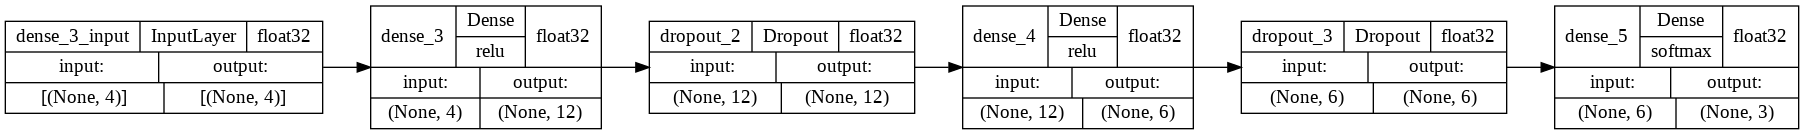

In [28]:
model = create_model_multi(learning_rate=learn_rate, dropout_rate=dropout_rate)

tf.keras.utils.plot_model(model , to_file='model_plot2.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_dtype=True, rankdir="LR",
                          expand_nested=False)

In [29]:
model_history = model.fit(X_train, y_train, batch_size=batch_size, validation_split=0.2, epochs=epochs, verbose=1)

Epoch 1/50
96/96 [==============================] - 1s 2ms/step - loss: 1.1040 - accuracy: 0.3333 - val_loss: 1.0817 - val_accuracy: 0.2917
Epoch 2/50
96/96 [==============================] - 0s 1ms/step - loss: 0.9108 - accuracy: 0.4375 - val_loss: 0.9227 - val_accuracy: 0.3750
Epoch 3/50
96/96 [==============================] - 0s 2ms/step - loss: 0.8074 - accuracy: 0.5417 - val_loss: 0.8260 - val_accuracy: 0.7500
Epoch 4/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6912 - accuracy: 0.7396 - val_loss: 0.7406 - val_accuracy: 0.9167
Epoch 5/50
96/96 [==============================] - 0s 2ms/step - loss: 0.6713 - accuracy: 0.7708 - val_loss: 0.6848 - val_accuracy: 0.9167
Epoch 6/50
96/96 [==============================] - 0s 1ms/step - loss: 0.6222 - accuracy: 0.8438 - val_loss: 0.6235 - val_accuracy: 0.9167
Epoch 7/50
96/96 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.8542 - val_loss: 0.5618 - val_accuracy: 0.9167
Epoch 8/50
96/96 [==

In [30]:
# Évaluation du réseau neuronal

precisions = model.evaluate(X_test, y_test, verbose=1)

print(f"Score sur l'ensemble de test : {precisions[0]}")
print(f"Précision sur l'ensemble de test : {precisions[1]}")

1/1 [==============================] - 0s 101ms/step - loss: 0.0666 - accuracy: 0.9667
Score sur l'ensemble de test : 0.0666159838438034
Précision sur l'ensemble de test : 0.9666666388511658


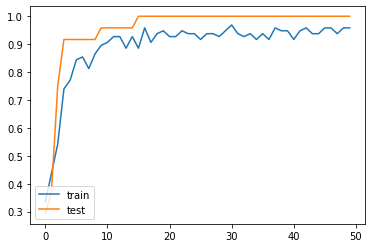

In [31]:
plt.plot(model_history.history['accuracy'], label='accuracy')
plt.plot(model_history.history['val_accuracy'], label='val_accuracy')

plt.legend(['train', 'test'], loc='lower left');
#Le résultat montre que sur l'ensemble d'apprentissage, notre modèle a convergé vers l' époque e 45. Les
#précisions finales de formation et de test sont presque identiques.

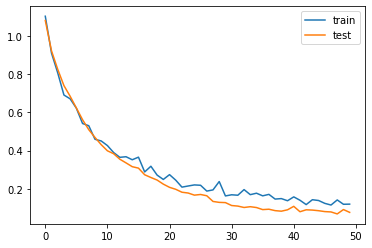

In [32]:
plt.plot(model_history.history['loss'], label='loss')
plt.plot(model_history.history['val_loss'], label='val_loss')

plt.legend(['train', 'test'], loc='upper right');

# CNN
CNN capable de classer une image d'articles de mode tels que des chemises, des
pantalons, des pantalons et des sandales dans l'une des 10 catégories prédéfinies.

In [33]:
from tensorflow.keras.models import Model

In [34]:
# Fashion MNIST qui contient des images de différents articles de mode avec leurs étiquettes.

mnist_data = tf.keras.datasets.fashion_mnist

(training_images, training_labels), (test_images, test_labels) = mnist_data.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [35]:
# normalise les valeurs de pixel entre 0 et 1.
training_images, test_images = training_images / 255, test_images/255

In [36]:
training_images. shape

(60000, 28, 28)

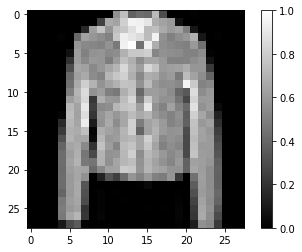

In [37]:
plt.imshow(test_images[10], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
training_images = np.expand_dims(training_images, -1)
test_images = np.expand_dims(test_images, -1)

print(training_images.shape)

(60000, 28, 28, 1)


In [39]:
# Trouver le nombre de classes de sortie

output_classes = len(set(training_labels))
print(f"Nombres de classes de sorties : {output_classes}")

Nombres de classes de sorties : 10


In [40]:
training_images[1].shape

(28, 28, 1)

In [41]:
# Modèle pour notre réseau de neurounes convolutionnels
# Avec l'API fonctionnelle Keras, pour connecter la couche précédente à la couche suivante,
# le nom de la couche précédente est passé entre parenthèses à la fin de la couche suivante.

input_layer = tf.keras.layers.Input(shape = training_images[0].shape)

conv1 = tf.keras.layers.Conv2D(32, (3,3), strides=2, activation=tf.keras.activations.relu)(input_layer)
maxpool1 = tf.keras.layers.MaxPool2D(2,2)(conv1)

conv2 = tf.keras.layers.Conv2D(64, (3,3), strides=2, activation=tf.keras.activations.relu)(maxpool1)
flatten1 = tf.keras.layers.Flatten()(conv2)

drop1 = tf.keras.layers.Dropout(0.2)(flatten1)
dense1 = tf.keras.layers.Dense(512, activation=tf.keras.activations.relu)(drop1)
drop2 = tf.keras.layers.Dropout(0.2)(dense1)

output_layer = tf.keras.layers.Dense(output_classes, activation=tf.keras.activations.softmax)(drop2)

model = Model(input_layer, output_layer)

In [42]:
# Compilons le modèle

model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics="accuracy")


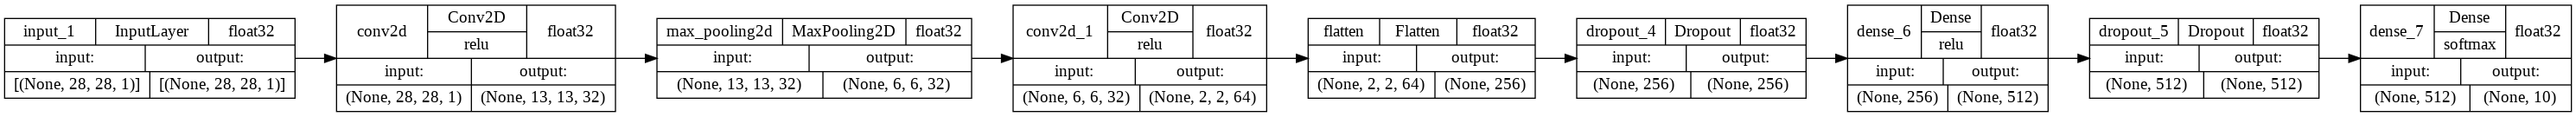

In [43]:
# Architecture du modèle
tf.keras.utils.plot_model(model , to_file='model_plot3.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_dtype=True, rankdir="LR",
                          expand_nested=False)

In [44]:
# Entrainer un modèle de classification d'images
model_history = model.fit(training_images, training_labels, epochs = 20, validation_data=(test_images, test_labels), verbose=1)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5833 - accuracy: 0.7855 - val_loss: 0.4326 - val_accuracy: 0.8430
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4217 - accuracy: 0.8426 - val_loss: 0.4124 - val_accuracy: 0.8464
Epoch 3/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3802 - accuracy: 0.8585 - val_loss: 0.3656 - val_accuracy: 0.8676
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3540 - accuracy: 0.8681 - val_loss: 0.3550 - val_accuracy: 0.8672
Epoch 5/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3302 - accuracy: 0.8771 - val_loss: 0.3494 - val_accuracy: 0.8688
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3182 - accuracy: 0.8817 - val_loss: 0.3224 - val_accuracy: 0.8816
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3013 - accuracy: 0.8867 - val_loss: 0.3424 - val_ac

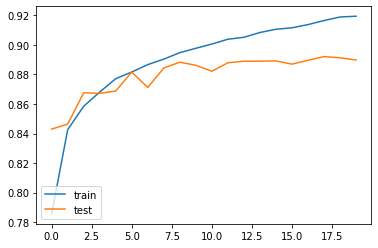

In [45]:
plt.plot(model_history.history['accuracy'], label = 'accuracy')
plt.plot(model_history.history['val_accuracy'], label = 'val_accuracy')
plt.legend(['train','test'], loc='lower left');

In [46]:
# Faisons une prédiction sur l'article 10 dont nous connaissons l'étiquette

output = model.predict(test_images)
prediction = np.argmax(output[10])
print(prediction)
# La sortie est un nombre qui correspond à une étiquette (4=>'coat'(qui signifie manteau))


313/313 [==============================] - 1s 2ms/step
4


# Types de problèmes de séquence :

- Le réseau de neurones récurrents « one-to-one » correspond à un RNN prenant un vecteur x(t) en entrée et retournant une seule sortie y(t).

- Le réseau de neurones récurrents « one-to-many » est un modèle capable de renvoyer une série de vecteurs en sortie pour un seul vecteur d’entrée.
Exemple : algorithme de génération de phrases capable de continuer l’écriture d’un texte.

- Le réseau de neurones récurrents « many-to-one » (aussi appelé « sequence to vector model») est un modèle utilisé pour générer un vecteur de sortie unique à partir d’une série d’entrées. C’est un modèle utilisé principalement dans des applications d'analyse des sentiments. 
Exemple : analyse de l’intention d’une phrase, c’est-à-dire dire si la phrase a une connotation positive ou négative.

- Le réseau de neurones récurrents « many-to-many » (aussi appelé « sequence to sequence model ») est un modèle utilisé pour renvoyer des séquences de vecteurs en sortie à partir d’une séquence de vecteurs en entrée. Ce type de RNN prend une série d'entrées et produit une série de sorties. On utilise cette topologie de RNN pour prédire des séries chronologiques (le prix d'une action en bourse). On fournit les valeurs sur les N derniers jours et le RNN produit les valeurs décalées d'un jour dans le futur.
Exemple : algorithme de traduction d’une langue vers une autre.

- Variante « many-to-many » : ce type de modèle peut avoir une autre représentation, cette fois-ci synchronisée. Cela signifie que chaque vecteur de la séquence d’entrée le modèle génère, au fur et à mesure, un vecteur de sortie.
Exemple : algorithme de labellisation des images d’une vidéo.


## One to One

In [47]:
X1 = list()
X2 = list()

X=list()
y=list()

X1 = [(x+1) * 4 for x in range(25)]
X2 = [(x+1) * 5 for x in range(25)]

y = [x1 * x2 for x1, x2 in zip(X1, X2)]

y = np.array(y)

In [48]:
X = np.column_stack((X1, X2))
print(X)
print('------------')
print(y)

# La première caractéristique contient une valeur qui est un multiple de 4 et la deuxième
# caractéristique contient une valeur qui est un multiple de 5. L'étiquette de sortie contient simplement le produit
# de deux caractéristiques.

[[  4   5]
 [  8  10]
 [ 12  15]
 [ 16  20]
 [ 20  25]
 [ 24  30]
 [ 28  35]
 [ 32  40]
 [ 36  45]
 [ 40  50]
 [ 44  55]
 [ 48  60]
 [ 52  65]
 [ 56  70]
 [ 60  75]
 [ 64  80]
 [ 68  85]
 [ 72  90]
 [ 76  95]
 [ 80 100]
 [ 84 105]
 [ 88 110]
 [ 92 115]
 [ 96 120]
 [100 125]]
------------
[   20    80   180   320   500   720   980  1280  1620  2000  2420  2880
  3380  3920  4500  5120  5780  6480  7220  8000  8820  9680 10580 11520
 12500]


In [49]:
# Le LSTM dans la bibliothèque TensorFlow Keras s'attend à ce que l'ensemble de données soit sous une forme
# tridimensionnelle, c'est-à-dire le nombre d'enregistrements, le pas de temps par enregistrement et les
# caractéristiques par pas de temps.

X = np.array(X).reshape(25,1,2)
X.shape

(25, 1, 2)

In [50]:
input_layer = tf.keras.layers.Input(shape=(1,2))
lstm1 = tf.keras.layers.LSTM(100, activation=tf.keras.activations.relu, return_sequences=True)(input_layer)

lstm2 = tf.keras.layers.LSTM(50, activation=tf.keras.activations.relu, return_sequences=True)(lstm1)
lstm3 = tf.keras.layers.LSTM(25, activation=tf.keras.activations.relu, return_sequences=True)(lstm2)

dense1 = tf.keras.layers.Dense(10, activation=tf.keras.activations.relu)(lstm3)
output_layer = tf.keras.layers.Dense(1)(dense1)

model = Model(input_layer, output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="mse")

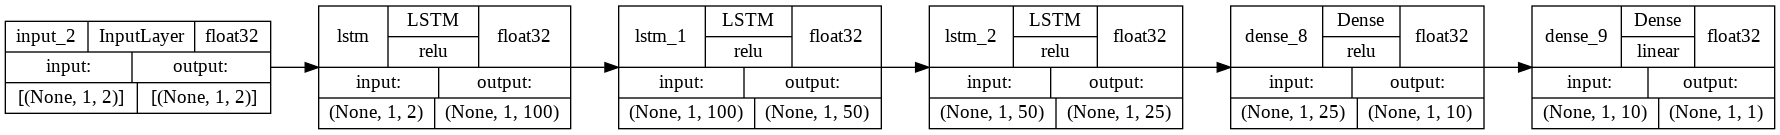

In [51]:
# Architecture du modèle
tf.keras.utils.plot_model(model , to_file='model_plot4.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_dtype=True, rankdir="LR",
                          expand_nested=False)

In [52]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 34458380.0000
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 34458196.0000
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 34458032.0000
Epoch 4/1000
1/1 [==============================] - 0s 9ms/step - loss: 34457804.0000
Epoch 5/1000
1/1 [==============================] - 0s 11ms/step - loss: 34457564.0000
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 34457348.0000
Epoch 7/1000
1/1 [==============================] - 0s 11ms/step - loss: 34457132.0000
Epoch 8/1000
1/1 [==============================] - 0s 11ms/step - loss: 34456896.0000
Epoch 9/1000
1/1 [==============================] - 0s 12ms/step - loss: 34456628.0000
Epoch 10/1000
1/1 [==============================] - 0s 8ms/step - loss: 34456336.0000
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 34456036.0000
Epoch 12/1000
1/1 [==========================

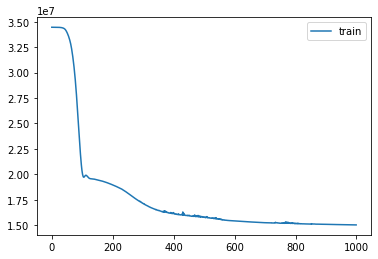

In [53]:
plt.plot(model_history.history['loss'], label = 'loss');
plt.legend(['train'], loc='upper right');

In [54]:
# Faisons une prédiction sur notre enregistrement à deux caractéristiques 100 et 125 => 125000

X_test = np.array([104,130])
X_test = np.array(X_test).reshape((1,1,2))

y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[[4855.307]]]


## Many to One

In [55]:
X1 = np.array([x+4 for x in range(0, 160, 4)])
print(X1)
X2 = np.array([x+5 for x in range(0, 200, 5)])
print(X2)

[  4   8  12  16  20  24  28  32  36  40  44  48  52  56  60  64  68  72
  76  80  84  88  92  96 100 104 108 112 116 120 124 128 132 136 140 144
 148 152 156 160]
[  5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85  90
  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175 180
 185 190 195 200]


In [56]:
X = np.column_stack((X1, X2))

X = np.array(X).reshape(20, 2, 2)
print(X)

[[[  4   5]
  [  8  10]]

 [[ 12  15]
  [ 16  20]]

 [[ 20  25]
  [ 24  30]]

 [[ 28  35]
  [ 32  40]]

 [[ 36  45]
  [ 40  50]]

 [[ 44  55]
  [ 48  60]]

 [[ 52  65]
  [ 56  70]]

 [[ 60  75]
  [ 64  80]]

 [[ 68  85]
  [ 72  90]]

 [[ 76  95]
  [ 80 100]]

 [[ 84 105]
  [ 88 110]]

 [[ 92 115]
  [ 96 120]]

 [[100 125]
  [104 130]]

 [[108 135]
  [112 140]]

 [[116 145]
  [120 150]]

 [[124 155]
  [128 160]]

 [[132 165]
  [136 170]]

 [[140 175]
  [144 180]]

 [[148 185]
  [152 190]]

 [[156 195]
  [160 200]]]


In [57]:
# La sortie sera la somme des deux caractéristiques
y = [sum(y) for y in [sum(x) for x in X]]
y = np.array(y)
print(y)

[ 27  63  99 135 171 207 243 279 315 351 387 423 459 495 531 567 603 639
 675 711]


In [58]:
input_layer = tf.keras.layers.Input(shape=(2,2))
lstm1 = tf.keras.layers.LSTM(100, activation=tf.keras.activations.relu, return_sequences=True)(input_layer)

lstm2 = tf.keras.layers.LSTM(50, activation=tf.keras.activations.relu, return_sequences=True)(lstm1)
lstm3 = tf.keras.layers.LSTM(25, activation=tf.keras.activations.relu, return_sequences=True)(lstm2)

dense1 = tf.keras.layers.Dense(10, activation=tf.keras.activations.relu)(lstm3)
output_layer = tf.keras.layers.Dense(1)(dense1)

model = Model(input_layer, output_layer)

model.compile(optimizer=tf.keras.optimizers.Adam(), loss="mse")

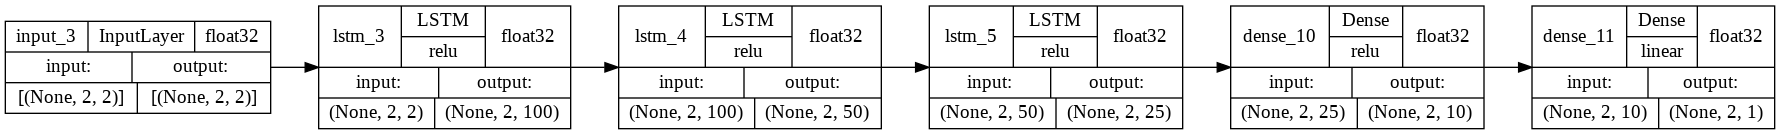

In [59]:
# Architecture du modèle
tf.keras.utils.plot_model(model , to_file='model_plot5.png', show_shapes=True, show_layer_names=True, show_layer_activations=True, show_dtype=True, rankdir="LR",
                          expand_nested=False)

In [60]:
model_history = model.fit(X, y, epochs=1000, verbose=1)

Epoch 1/1000
1/1 [==============================] - 3s 3s/step - loss: 179323.7500
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 179285.4062
Epoch 3/1000
1/1 [==============================] - 0s 10ms/step - loss: 179256.1406
Epoch 4/1000
1/1 [==============================] - 0s 13ms/step - loss: 179235.7656
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 179221.2188
Epoch 6/1000
1/1 [==============================] - 0s 9ms/step - loss: 179206.1719
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 179192.7188
Epoch 8/1000
1/1 [==============================] - 0s 10ms/step - loss: 179178.7031
Epoch 9/1000
1/1 [==============================] - 0s 11ms/step - loss: 179162.4219
Epoch 10/1000
1/1 [==============================] - 0s 10ms/step - loss: 179142.5938
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 179119.2344
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step -

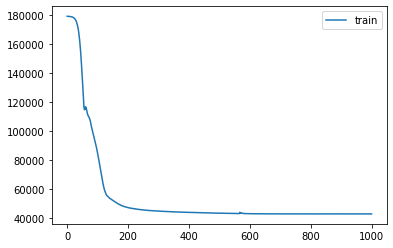

In [61]:
plt.plot(model_history.history['loss'], label = 'loss');
plt.legend(['train'], loc='upper right');

In [62]:
X_test = np.array([[200, 225],[204,230]])
X_test = X_test.reshape((1, 2, 2))
y_pred = model.predict(X_test, verbose=0)
print(y_pred)

[[[471.363  ]
  [446.53867]]]


## Prédire les cours futurs des actions

In [63]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [64]:
fb_complete_data = pd.read_csv('/content/drive/MyDrive/fb_train.csv');
fb_complete_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-24,343.239990,354.350006,342.369995,352.959991,352.959991,18801900
1,2021-09-27,349.809998,355.149994,347.079987,353.579987,353.579987,15205800
2,2021-09-28,347.970001,349.600006,338.920013,340.649994,340.649994,21710300
3,2021-09-29,343.149994,345.230011,338.880005,339.609985,339.609985,14452200
4,2021-09-30,340.450012,342.799988,338.149994,339.390015,339.390015,16547100


In [65]:
# Seule la colonne Open nous intéresse

fb_data_processed = fb_complete_data[["Open"]].values
fb_data_processed

array([[343.23999 ],
       [349.809998],
       [347.970001],
       [343.149994],
       [340.450012],
       [341.609985],
       [335.529999],
       [328.579987],
       [329.73999 ],
       [337.      ],
       [331.51001 ],
       [327.630005],
       [323.029999],
       [326.970001],
       [328.359985],
       [328.679993],
       [328.950012],
       [339.649994],
       [343.450012],
       [340.279999],
       [326.350006],
       [320.299988],
       [328.26001 ],
       [314.190002],
       [312.98999 ],
       [320.190002],
       [326.040009],
       [331.380005],
       [327.48999 ],
       [334.01001 ],
       [340.309998],
       [344.420013],
       [340.      ],
       [332.48999 ],
       [329.820007],
       [330.179993],
       [344.339996],
       [343.829987],
       [344.23999 ],
       [339.720001],
       [342.200012],
       [349.049988],
       [338.929993],
       [336.      ],
       [335.799988],
       [336.890015],
       [335.      ],
       [330.2

In [66]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
fb_training_scaled = scaler.fit_transform(fb_data_processed)

In [67]:
fb_training_features= []
fb_training_labels = []

for i in range(60, len(fb_training_scaled)):
  fb_training_features.append(fb_training_scaled[i-60:i, 0])
  fb_training_labels.append(fb_training_scaled[i, 0])

In [68]:
X_train = np.array(fb_training_features)
y_train = np.array(fb_training_labels)

print(X_train.shape)
print(y_train.shape)

(192, 60)
(192,)


In [69]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(192, 60, 1)

In [70]:
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], 1))

lstm1 = tf.keras.layers.LSTM(100, activation=tf.keras.activations.relu, return_sequences=True)(input_layer)
drop1 = tf.keras.layers.Dropout(0.2)(lstm1)

lstm2 = tf.keras.layers.LSTM(100, activation=tf.keras.activations.relu, return_sequences=True)(drop1)
drop2 = tf.keras.layers.Dropout(0.2)(lstm2)

lstm3 = tf.keras.layers.LSTM(100, activation=tf.keras.activations.relu, return_sequences=True)(drop2)
drop3 = tf.keras.layers.Dropout(0.2)(lstm3)

lstm4 = tf.keras.layers.LSTM(100, activation=tf.keras.activations.relu, return_sequences=True)(drop3)
drop4 = tf.keras.layers.Dropout(0.2)(lstm4)

output_layer = tf.keras.layers.Dense(1)(drop4)

model = Model(input_layer, output_layer)

model.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = "mse"
)


In [71]:
print(X_train.shape)
print(y_train.shape)
y_train= y_train.reshape(-1,1)
print(y_train.shape)

(192, 60, 1)
(192,)
(192, 1)


In [72]:
model_history = model.fit(X_train, y_train, epochs=100, verbose=1, batch_size=32)

Epoch 1/100
6/6 [==============================] - 3s 114ms/step - loss: 0.1517
Epoch 2/100
6/6 [==============================] - 1s 110ms/step - loss: 0.0792
Epoch 3/100
6/6 [==============================] - 1s 110ms/step - loss: 0.0610
Epoch 4/100
6/6 [==============================] - 1s 109ms/step - loss: 0.0579
Epoch 5/100
6/6 [==============================] - 1s 110ms/step - loss: 0.0531
Epoch 6/100
6/6 [==============================] - 1s 109ms/step - loss: 0.0492
Epoch 7/100
6/6 [==============================] - 1s 119ms/step - loss: 0.0458
Epoch 8/100
6/6 [==============================] - 1s 108ms/step - loss: 0.0437
Epoch 9/100
6/6 [==============================] - 1s 108ms/step - loss: 0.0419
Epoch 10/100
6/6 [==============================] - 1s 109ms/step - loss: 0.0418
Epoch 11/100
6/6 [==============================] - 1s 108ms/step - loss: 0.0416
Epoch 12/100
6/6 [==============================] - 1s 111ms/step - loss: 0.0451
Epoch 13/100
6/6 [===================

In [73]:
fb_testing_complete_data = pd.read_csv('/content/drive/MyDrive/fb_test.csv');
fb_testing_processed = fb_testing_complete_data[['Open']]. values

In [74]:
fb_all_data = pd.concat((fb_complete_data['Open'], fb_testing_complete_data['Open']), axis=0)

In [75]:
test_inputs = fb_all_data [len(fb_all_data ) - len(fb_testing_complete_data) - 60:].values
print(test_inputs.shape)

(79,)


In [76]:
test_inputs = test_inputs.reshape(-1,1)
test_inputs = scaler.transform(test_inputs)
print(test_inputs.shape)

(79, 1)


In [77]:
fb_test_features = []
for i in range(60, 80):
  fb_test_features.append(test_inputs[i-60:i, 0])

In [78]:
X_test = np.array(fb_test_features)
print(X_test.shape)

(20, 60)


In [79]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(20, 60, 1)


In [80]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 410ms/step


In [81]:
y_pred.shape

(20, 60, 1)